# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
display(merged_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [107]:
# Checking the number of mice.
num_unique_mice = merged_data["Mouse ID"].nunique()

# Display the number of unique mice
print(f"Number of unique mice: {num_unique_mice}")

Number of unique mice: 249


In [108]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Display the array of duplicate Mouse IDs
print("Duplicate Mouse IDs:")
print(duplicate_mice_ids)

Duplicate Mouse IDs:
['g989']


In [109]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter data for the duplicate Mouse ID 'g989'
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == 'g989']

# Display the data table for the duplicate Mouse ID
print("Data for Duplicate Mouse ID 'g989':")
display(duplicate_mouse_data)

Data for Duplicate Mouse ID 'g989':


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the rows with duplicate Mouse IDs, keeping the first occurrence
clean_data = merged_data.drop_duplicates(subset="Mouse ID", keep="first")

# Display the clean DataFrame
print("Clean DataFrame after dropping all instances of duplicate mice:")
clean_data.head()

Clean DataFrame after dropping all instances of duplicate mice:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [111]:
# Checking the number of mice in the clean DataFrame.
# Check the number of unique mice in the clean DataFrame

# Check the number of unique mice in the clean DataFrame
num_unique_mice_clean = clean_data["Mouse ID"].nunique()

# Display the number of unique mice in the clean DataFrame
print(f"Number of unique mice in the clean DataFrame: {num_unique_mice_clean}")

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by 'Drug Regimen' and calculate the statistics
summary_stats_df = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better interpretation
summary_stats_df = summary_stats_df.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics DataFrame
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [113]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


# Using the aggregation method, produce the same summary statistics in a single line


# Group the data by 'Drug Regimen' and calculate the statistics in a single line
summary_stats_agg_df = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_SEM='sem'
)

# Display the summary statistics DataFrame
summary_stats_agg_df


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

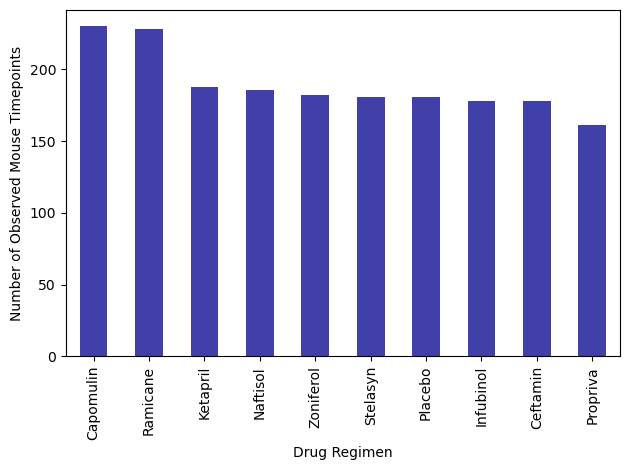

In [114]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = merged_data["Drug Regimen"].value_counts()

# Generate the bar plot
drug_regimen_counts.plot(kind="bar", color="darkblue", alpha=0.75, align="center", width=0.5)

# Set plot title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Display the bar plot
plt.tight_layout()
plt.show()

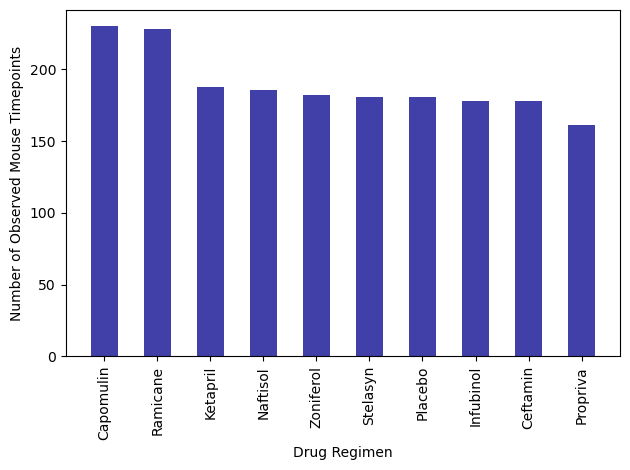

In [115]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Generate the bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="darkblue", alpha=0.75, align="center", width=0.5)

# Set plot title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the bar plot
plt.tight_layout()
plt.show()

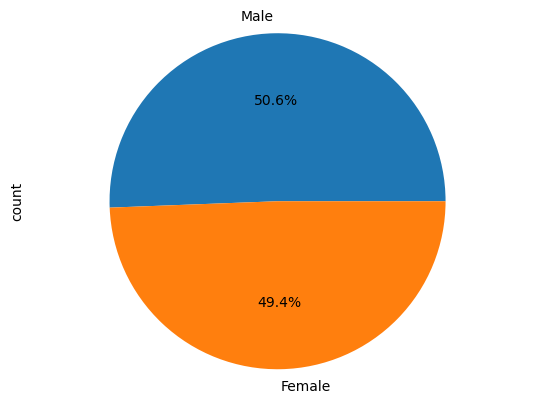

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the distribution of female versus male mice
sex_distribution = merged_data["Sex"].value_counts()

# Generate the pie plot using Pandas
sex_distribution.plot(kind="pie", labels=sex_distribution.index, autopct="%1.1f%%")

# Display the pie plot
plt.axis("equal")
plt.show()

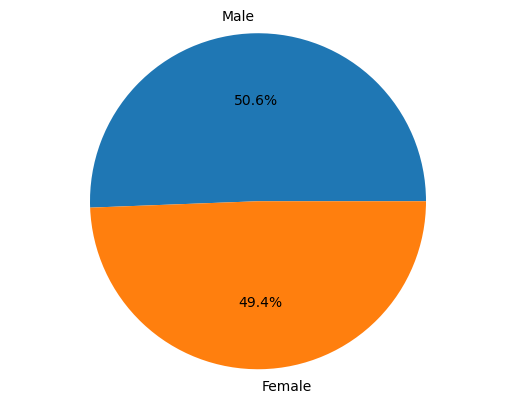

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate the pie plot using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index, autopct="%1.1f%%")

# Display the pie plot
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last (greatest) timepoint for each mouse
last_timepoint = merged_data.groupby("Mouse ID")["Timepoint"].max()

# Create a DataFrame to store the last timepoint data
final_tumor_volume_df = pd.DataFrame(last_timepoint)

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(final_tumor_volume_df, merged_data, on=["Mouse ID", "Timepoint"], how="left")

# Filter the DataFrame to include only the specified treatment regimens
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(selected_treatments)]

# Display the DataFrame with the final tumor volume for each mouse in the selected treatment regimens
print(final_tumor_volume_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_groups = final_tumor_volume_df['Drug Regimen'].unique()

# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_groups:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # Add subset
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    median_quartile = quartiles[0.5]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    tumor_volume_data.append(treatment_data.to_list())



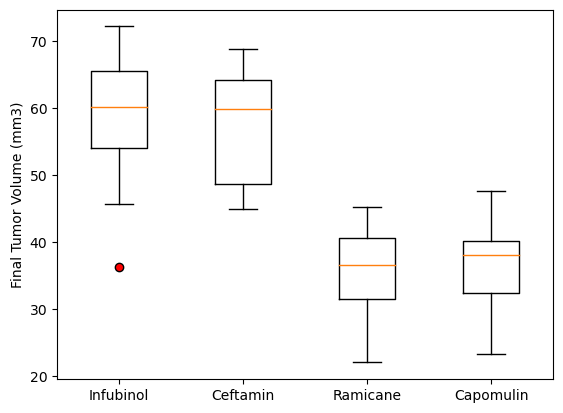

In [120]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data, labels=treatment_groups, flierprops=dict(markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

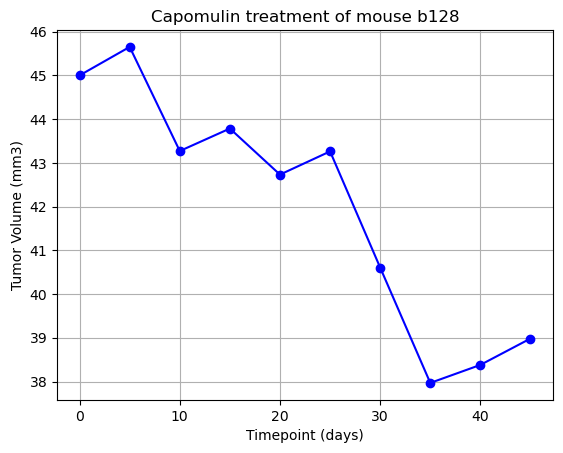

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse treated with Capomulin)
selected_mouse = 'b128'

# Filter the data to include only the time points and tumor volumes for the selected mouse
capomulin_data = merged_data.loc[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == selected_mouse)]

# Generate the line plot of tumor volume vs. time point for the selected mouse
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment of mouse {selected_mouse}")
plt.grid()
plt.show()

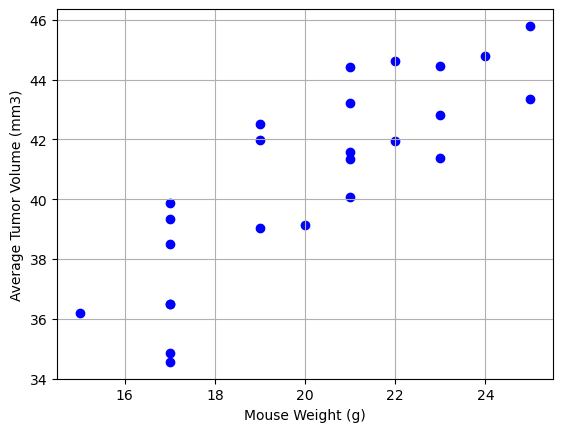

In [122]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only the rows corresponding to the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group the Capomulin data by 'Mouse ID' and calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


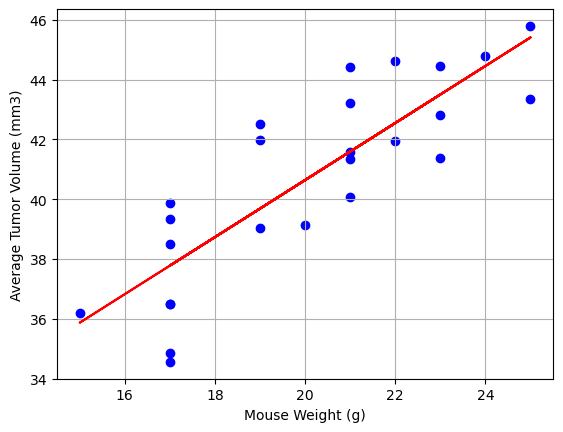

In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only the rows corresponding to the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group the Capomulin data by 'Mouse ID' and calculate the average tumor volume and mouse weight for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)

# Perform linear regression for mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Generate the scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the linear regression line to the plot
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, color='red', label='Linear Regression')

plt.grid()
plt.show()